In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
df = pd.read_csv('./iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [50]:
df.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [21]:

sepal_length_array = np.array(df['sepal_length'])
sepal_width_array = np.array(df['sepal_width'])
petal_length_array = np.array(df['petal_length'])
petal_width_array = np.array(df['petal_width'])
array_list = [sepal_length_array,sepal_width_array,petal_length_array,petal_width_array]

1) 주어진 데이터 공분산을 계산하세요

In [58]:
sub_df = df.copy()

In [59]:
sub_df.columns= ['꽃받침 길이','꽃받침 너비','꽃잎 길이','꽃잎 너비', '품종']
sub_df

,꽃받침 길이,꽃받침 너비,꽃잎 길이,꽃잎 너비,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [60]:
np.cov(sepal_length_array, sepal_width_array, ddof=0)

array([[ 0.68112222, -0.03900667],
       [-0.03900667,  0.18675067]])

In [61]:
np.cov(sepal_length_array, petal_length_array, ddof=0)

array([[0.68112222, 1.26519111],
       [1.26519111, 3.09242489]])

In [62]:
def cov_iris(a,b):
    return np.cov(a,b, ddof=0)

In [63]:
for a in range(4):
    for b in range(4):
        if a > b:
            print(f'{sub_df.columns[a]}와 {sub_df.columns[b]}공분산 = {cov_iris(array_list[a],array_list[b])[0][1]}')

꽃받침 너비와 꽃받침 길이공분산 = -0.039006666666666676
꽃잎 길이와 꽃받침 길이공분산 = 1.2651911111111118
꽃잎 길이와 꽃받침 너비공분산 = -0.319568
꽃잎 너비와 꽃받침 길이공분산 = 0.5134577777777779
꽃잎 너비와 꽃받침 너비공분산 = -0.11719466666666656
꽃잎 너비와 꽃잎 길이공분산 = 1.2877448888888894


2) 주어진 데이터의 상관계수를 계산하세요

In [64]:
for a in range(4):
    for b in range(4):
        if a > b:
            print(f'{sub_df.columns[a]}와 {sub_df.columns[b]}의 상관계수 = {np.corrcoef(array_list[a],array_list[b])[0][1]}')

꽃받침 너비와 꽃받침 길이의 상관계수 = -0.10936924995064937
꽃잎 길이와 꽃받침 길이의 상관계수 = 0.8717541573048718
꽃잎 길이와 꽃받침 너비의 상관계수 = -0.42051609640115445
꽃잎 너비와 꽃받침 길이의 상관계수 = 0.8179536333691637
꽃잎 너비와 꽃받침 너비의 상관계수 = -0.35654408961380535
꽃잎 너비와 꽃잎 길이의 상관계수 = 0.9627570970509663


3) 각 특성별로 히스토그램 그려보세요

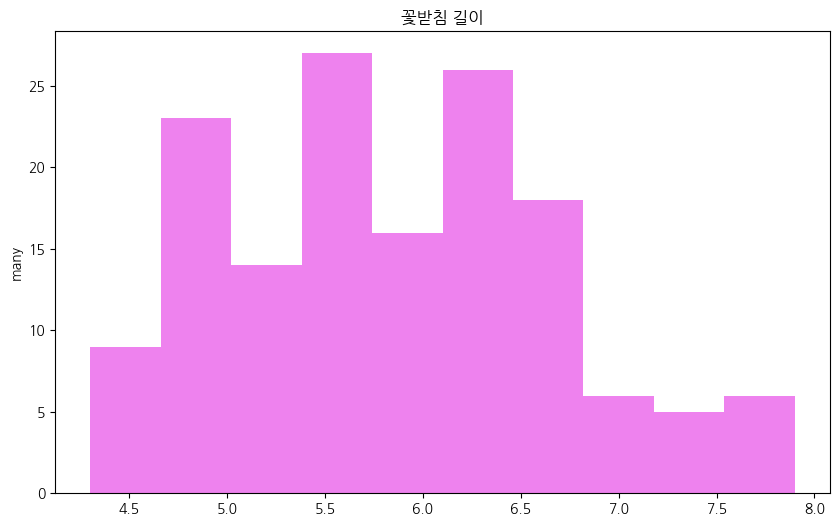

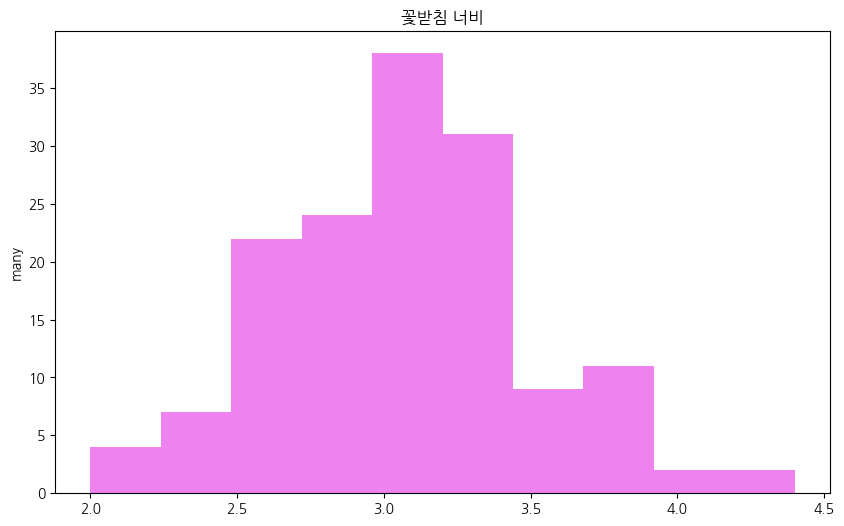

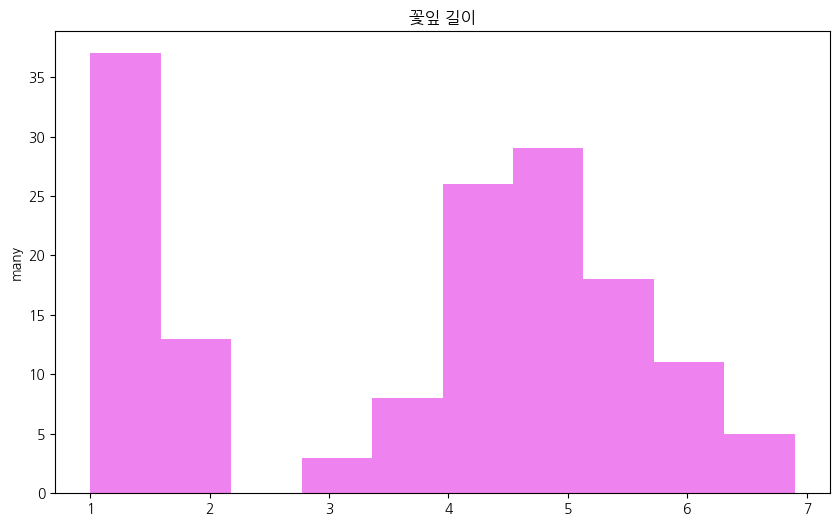

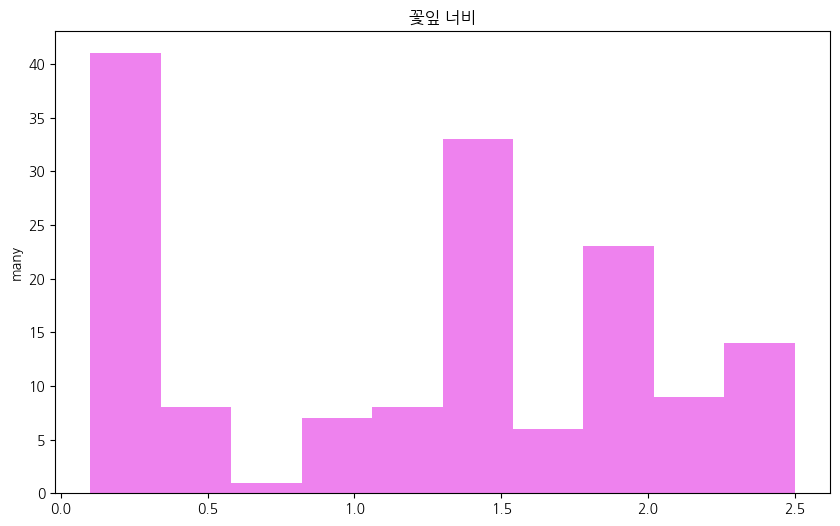

In [67]:
for a in range(4):
    plt.figure(figsize=(10,6))
    plt.hist(array_list[a],color='violet')
    plt.title(sub_df.columns[a])
    plt.ylabel('many')
    plt.show()

4) 각 품종별로 특성에 대한 box plot 그리기

In [85]:
iris_list=sub_df['품종'].unique()
iris_list=list(iris_list)
iris_list

['setosa', 'versicolor', 'virginica']

In [105]:
datalist=list(sub_df.columns[:-1])
datalist

['꽃받침 길이', '꽃받침 너비', '꽃잎 길이', '꽃잎 너비']

In [86]:
df_setosa=sub_df[sub_df['품종']=='setosa']
df_versicolor=sub_df[sub_df['품종']=='versicolor']
df_virginica=sub_df[sub_df['품종']=='virginica']

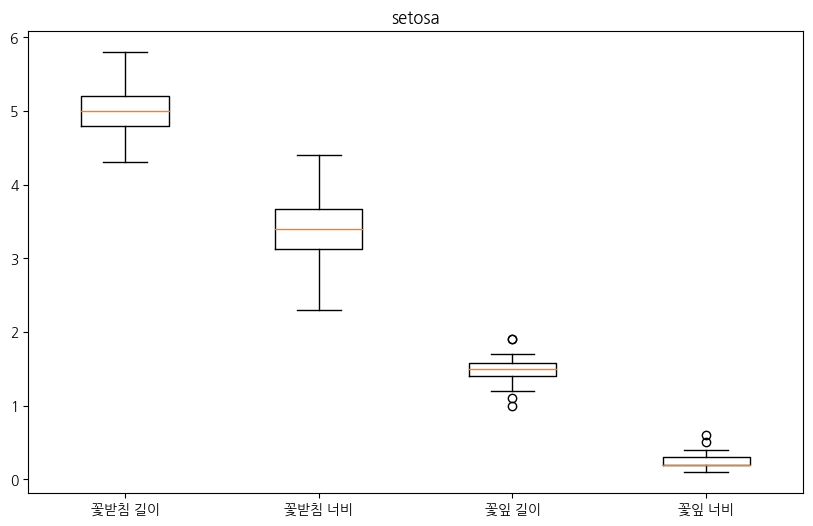

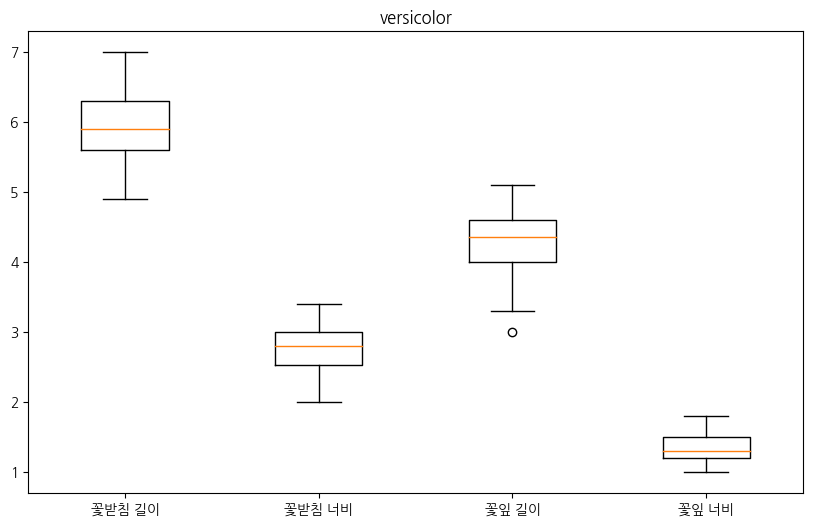

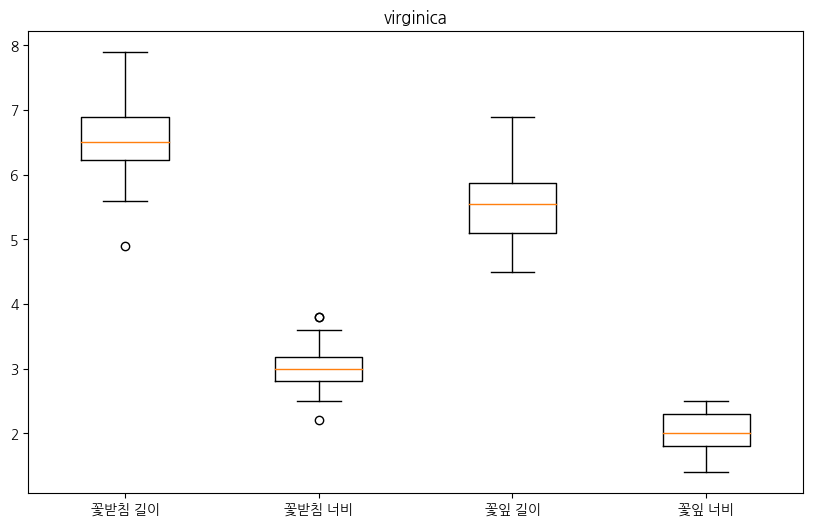

In [133]:
iris_color = ['mediumslateblue','darkviolet','blueviolet']
for i in range(3):
    plt.figure(figsize=(10,6))
    F_df=sub_df[sub_df['품종']== iris_list[i]]
    boxlist=[]
    for b in datalist:
        boxlist.append(np.array(F_df[b]))
    plt.boxplot(boxlist )
    plt.xticks([1,2,3,4],labels=['꽃받침 길이', '꽃받침 너비', '꽃잎 길이', '꽃잎 너비'])
    plt.title(iris_list[i])
    plt.show()

5) 각 품종별로 길이와 너비의 관계를 산점도로 나타내고 색상으로 품종을 구분하세요

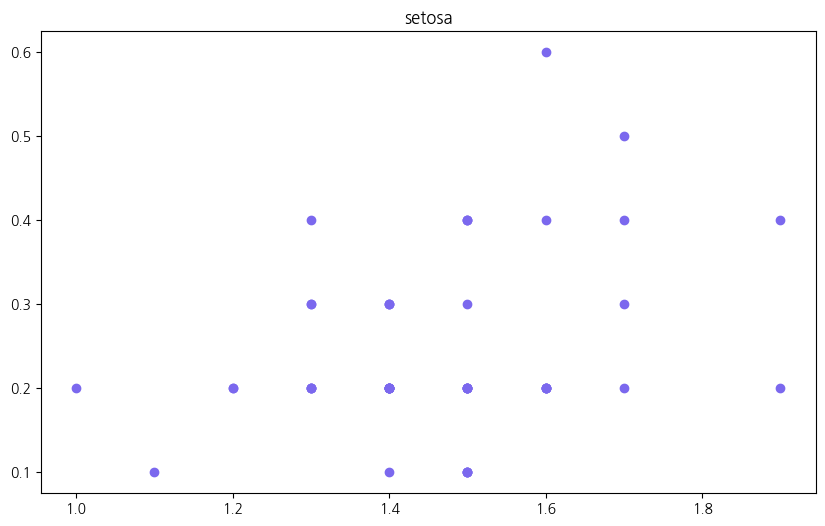

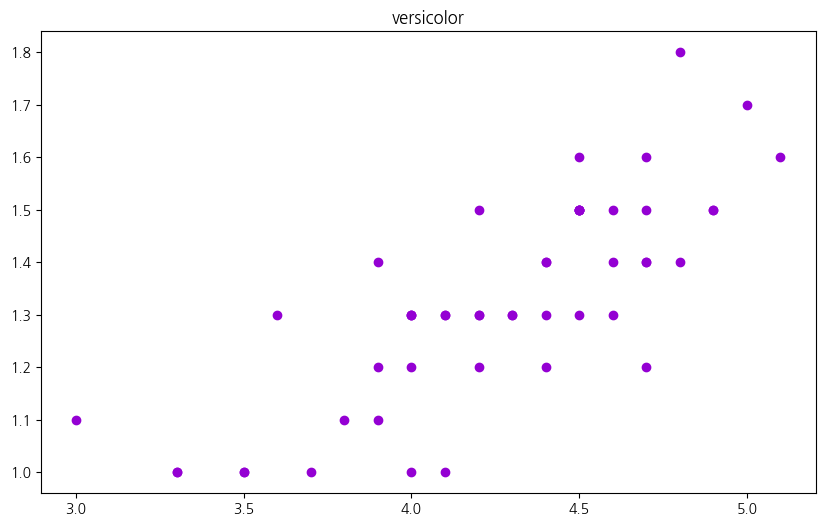

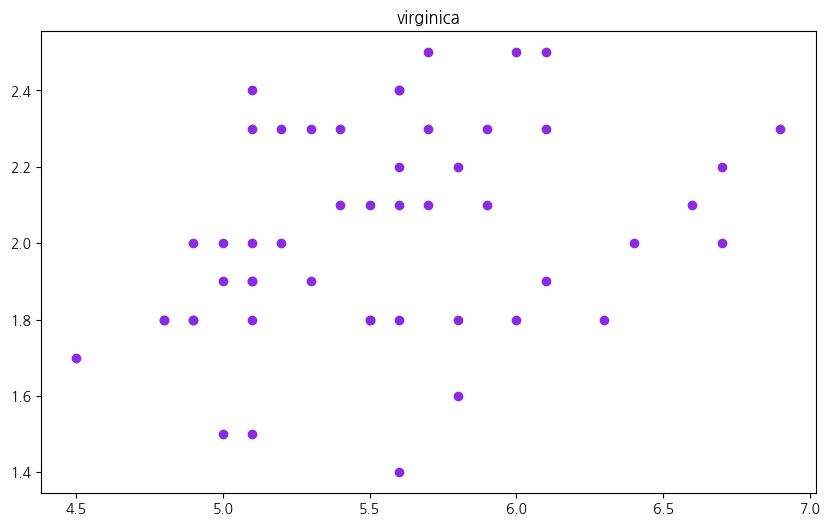

In [119]:
iris_color = ['mediumslateblue','darkviolet','blueviolet']
color_list = ['r','g','b']
for i in range(3):
    plt.figure(figsize=(10,6))
    F_df=sub_df[sub_df['품종']== iris_list[i]]
    plt.scatter(F_df['꽃잎 길이'],F_df['꽃잎 너비'],c=iris_color[i])
    plt.title(iris_list[i])
    plt.show()